In [190]:
import matplotlib.pyplot as plt
import math

def sin_series_gen(freq,amplitude,dt,t_series):
    return [math.sin((dt * freq * 2 * math.pi * amplitude) * t_series[i] / dt) for i in range(len(t_series))]

def unit_step_series_gen(t0,dt,t_series):
    return [1 if t_series[i] >= -t0 else 0 for i in range(len(t_series))]

def time_series_gen(duration):
    dt = duration / 1000 * 1.25
    series = [dt * i for i in range(-250,1000,1)]
    return dt,series

def sum_series(*args : list,scale_down = True):
    argLen = len(args[0])
    tempSum = 0
    sum : list = []
    for index in range(argLen):
        for argIndex in range(len(args)):
            tempSum += args[argIndex][index]
            # print(tempSum)
        sum.append(tempSum * ((1 / len(args)) if scale_down == True else 1))
        tempSum = 0
    return sum

def sub_series(*args : list,scale_down = True):
    argLen = len(args[0])
    tempSub = 0
    sub : list = []
    for index in range(argLen):
        for argIndex in range(1,len(args)):
            tempSub = args[0][index] - args[argIndex][index]
            sub.append(tempSub * ((1 / len(args)) if scale_down == True else 1))
            # print(tempSub)
        # tempSub = 1
    return sub

def multi_series(*args : list,scale_down = True):
    argLen = len(args[0])
    tempMulti = 1
    sum : list = []
    for index in range(argLen):
        for argIndex in range(len(args)):
            tempMulti *= args[argIndex][index] 
        sum.append(tempMulti * ((1 / len(args)) if (scale_down == True) else 1))
        tempMulti = 1
    return sum


In [191]:
import numpy as np
def dft(x):
  N, yr, yi = len(x), [], []
  for k in range(N):
    real, imag = 0, 0
    for n in range(N):
      theta = -k * (2 * math.pi) * (float(n) / N)
      real += x[n] * math.cos(theta)
      imag += x[n] * math.sin(theta)
    yr.append(real / N)
    yi.append(imag / N)
  return yr, yi

def my_dft(arr : list):
    length = len(arr)
    result = 0
    output = []
    for j in range(length):
      for index,member in enumerate(arr):
          result += member * np.exp(-1j*2*np.pi*index*j / length)
      output.append(result)
      result = 0
      
    return output

dt, t_series = time_series_gen(5)
sin_series_1 = sin_series_gen(1,1,dt,t_series)
sin_series_5 = sin_series_gen(50,0.5,dt,t_series)
sin_series_10 = sin_series_gen(100,0.2,dt,t_series)
sin_sum = sum_series(sin_series_1,sin_series_5,sin_series_10)

step1 = unit_step_series_gen(0,dt,t_series)
step2 = unit_step_series_gen(-3,dt,t_series)
step_sub = sub_series(step1,step2,scale_down=False)

# -(e^-st / s)
# -e^-jwt
# fig2,ax2 = plt.subplots()

# ax2.plot(t_series,step_sub)

# fig,ax = plt.subplots(3)
# ax.plot(t_series,step_sub)
# ax[0].plot(t_series,step1)
# ax[1].plot(t_series,step2)
x = my_dft(sin_sum)

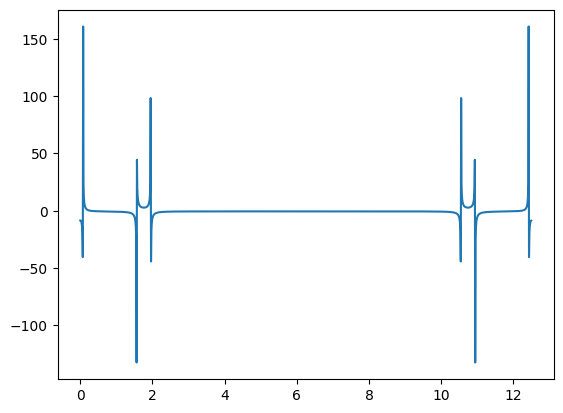

In [193]:
fig3,ax3 = plt.subplots()
y = x[500:]
ax3.plot([i*0.01 for i in range(len(x))],x)

In [ ]:
#DFT Test
import numpy as np
def dft(arr : list,inputIndex):
    length = len(arr)
    result = 0
    for index,member in enumerate(arr):
        # print(index,member)
        result += member * np.exp(-1j*2*np.pi*index*inputIndex / length)
    return result

arr = [0,1,2,3]
for i,mem in enumerate(arr):
    print(dft(arr,i))
    
    

## EMA Filter with cutoff frequency
According to this [This Video](https://www.youtube.com/watch?v=1e_ZB8p5n6s&t=318s&ab_channel=Phil%E2%80%99sLab) inspires me to try to create low pass filter using EMA filter with custom cut-off frequency using following formula
$$y_n=\alpha*x_n+(1-\alpha)*y_{n-1}$$

[Reference Formula conversion](https://dsp.stackexchange.com/questions/40462/exponential-moving-average-cut-off-frequency) to get the formula in terms of alpha ($\alpha$)

In [12]:
import matplotlib.pyplot as plt
import math
dataLen = 16000
dt = 1/(dataLen)
time = [i / dataLen for i in range(dataLen)]
sin2 = [math.sin(2 * math.pi * i/dataLen * 1000) for i in range(dataLen)]
sin50 = [math.sin(2 * math.pi * i/dataLen * 5000) * 0.2 for i in range(dataLen)]
sinSum = [sin2[i] + sin50[i] for i in range(dataLen)]
# rc = dt/(2*math.pi*fc)
# alpha = 0.01

# o3db = math.acos(1)
alpha = 0.98
fc = (48e3 / (2*math.pi))*math.acos((1-(alpha**2))/(2*(1-alpha)))
# alpha = math.cos(2*math.pi*fc / dataLen) - 1 + math.sqrt(math.cos(2*math.pi*fc / dataLen) ** 2 - 4 * math.cos(2*math.pi*fc / dataLen) + 3)

# f3db = dataLen/(2*math.pi)*math.acos(1-(alpha**2)/(2*(1-alpha)))

print("fc :",fc) 
# alpha = 0.01
# outVal = 0
# sinOut = []
# for k in range(dataLen):
#     outVal = alpha * sinSum[k] + (1-alpha) * outVal
#     sinOut.append(outVal)
# outStageN = [0] * dataLen
# for k in range(dataLen):
#     outVal = alpha * sinOut[k] + (1-alpha) * outVal
#     outStageN[k] = outVal
# for i in range(1000):
#     outStageN = [0] * dataLen
#     for k in range(dataLen):
#         outVal = alpha * outStageN[k] + (1-alpha) * outVal
#         outStageN[k] = outVal
# plt.plot(time[:500],sinSum[:500],time[:500],sinOut[:500])

fc : 1081.281927465831


## Frequency Response function test
[Reference Plot](https://notebook.community/mholtrop/Phys605/Python/Signal/RC_Filters_in_Python)

[Low pass filter Transfer function](https://www.allaboutcircuits.com/technical-articles/understanding-transfer-functions-for-low-pass-filters/)

Fh : 99.47183943243459
Fl : 198.94367886486918
0.01464581866281304


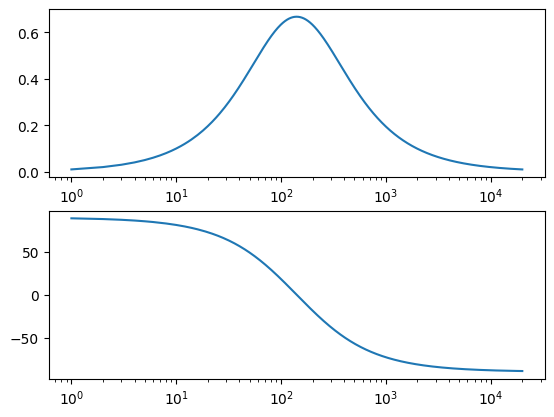

In [1]:
import matplotlib.pyplot as plt
import math
vin = 1
c = 1e-9
rl = 800000
rh = 1600000
offset = 0.5
fh = 1/(2*math.pi*rh*c)
fl = 1/(2*math.pi*rl*c)
print("Fh :",fh)
print("Fl :",fl)
gain1 = 1
gain2 = 1
voStage1 = []
voStage2 = []
voStage3 = []
for freq in range(1,20000):
    s = 1j * 2 * math.pi * freq * c
    vo = 1 * (1/s) / ((1/s) + rl)
    vo = vo * rh / (1/s + rh)
    voStage1.append(vo * gain1)

c = 10e-10
rl = 80000
rh = 100000 

for freq in range(1,20000):
    s = 1j * 2 * math.pi * freq * c
    vo = 1 * (1/s) / ((1/s) + rl)
    vo = vo * rh / (1/s + rh)
    voStage2.append(vo * gain2)

c = 1e-6
rl = 10000
rh = 50000

for freq in range(1,20000):
    s = 1j * 2 * math.pi * freq * c
    vo = 1 * (1/s) / ((1/s) + rl)
    vo = vo * rh / (1/s + rh)
    voStage3.append(vo * gain2)

voSum = voStage1

# for i in range(len(voStage1) - 1):
#     voSum.append((voStage1[i] + voStage2[i] + voStage3[i]))


fig, ax = plt.subplots(2)

ax[0].ticklabel_format(useOffset=False, style='plain')
ax[0].set_yscale("linear")
ax[1].set_yscale("linear")
ax[0].set_xscale("log")
ax[1].set_xscale("log")

# ax[0].plot(range(1,len(voStage1) + 1),[i.real for i in voStage1])
# ax[1].plot(range(1,len(voStage1) + 1),[math.atan(i.imag / i.real) * 180 / math.pi for i in voStage1])
# print(voStage1[2000].real)
ax[0].plot(range(1,len(voSum) + 1),[math.sqrt((i.real)**2 + (i.imag)**2) for i in voSum])
ax[1].plot(range(1,len(voSum) + 1),[math.atan(i.imag / i.real) * 180 / math.pi for i in voSum])
print(voSum[2000].real)
# plt.plot(range(1,len(voArr) + 1),[i.imag * (180 / math.pi) for i in voArr])
# plt.show()
# f3db = dataLen/(2*math.pi)*math.acos(1-(alpha**2)/(2*(1-alpha)))

# alpha = 0.01

File openned


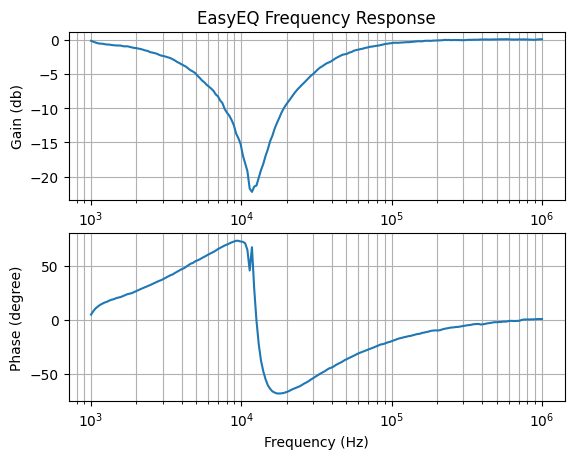

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import csv

freq = []
mag = []
phase = []
fig,ax = plt.subplots(2)
fileName = "rlcFilterAgain"
with open(f'./EasyEQ test results/{fileName}.csv','r') as file:
    print("File openned")
    reader = csv.reader(file)
    for row in reader:
        # freq.append(10**(float(row[0])/20))
        freq.append(float(row[0]))
        mag.append(20*np.log10(float(row[1])))
        phase.append(float(row[2]))

alpha = 0.3
mag_filtered = [0]*len(freq)
phase_filtered = [0]*len(freq)
for index,mag_i in enumerate(mag):
    mag_filtered[index]  = (alpha * mag_i) + ((1-alpha)*mag_filtered[index-1 if index > 0 else 0])
for index,phase in enumerate(phase):
    phase_filtered[index]  = (alpha * phase) + ((1-alpha)*phase_filtered[index-1 if index > 0 else 0])
      
ax[0].set_xscale("log")
ax[1].set_xscale("log")
# ax.set_xlim([20,20e3])
# ax.set_ylim([-0.1,0.1])
ax[0].set_ylabel("Gain (db)")
ax[0].set_xlabel("Frequency (Hz)")
ax[1].set_ylabel("Phase (degree)")
ax[1].set_xlabel("Frequency (Hz)")
ax[0].set_title("EasyEQ Frequency Response")
ax[0].grid(True, which="both", ls="-")
ax[1].grid(True, which="both", ls="-")

# freqInterp = np.interp(2.5,freq,mag)
# print(freqInterp)
ax[0].plot(freq,mag_filtered)
ax[1].plot(freq,phase_filtered)
# fig.savefig(f"./EasyEQ test results/{fileName}.svg")
# fig.savefig(f"./EasyEQ test results/{fileName}.png")
plt.show()